In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [4]:
propeller = pd.read_csv('propeller_data.csv')

In [5]:
positions = [33, 66]

In [6]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [15]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [12]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2


In [64]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

7
11
9
11


In [68]:
right_param

[array([-3.36838159e-05, -1.50562703e-04,  4.68298250e-03,  4.13809008e-01,
         8.81481924e-01]),
 array([-3.35068748e-05, -1.96885126e-04,  6.12010936e-03,  2.10736895e-01,
         9.20448394e-01])]

In [69]:
left_param

[array([ 4.74879186e-05,  1.60238978e-04,  4.48058006e-03,  5.12945433e-01,
        -4.30118526e-01]),
 array([ 1.77105360e-05, -8.20433899e-05,  4.19560101e-03,  2.86262261e-01,
        -2.69475172e-01])]

In [81]:
x_list, y_right_list, y_left_list, right_pts, left_pts, rm = get_generated_points_xfoil(right_param, left_param, right_pts, left_pts)

In [60]:
scale = 22.59989
b = -14.39806
x = [1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.1, 0.0750, 0.05, 0.025, 0.0125, 0]
x = [a * scale + b for a in x ] 
print("Before")
x = np.array( [x] )
print(x)

Before
[[  8.20183      7.0718355    5.941841     3.681852     1.421863
   -0.838126    -3.098115    -5.358104    -7.618093    -8.7480875
   -9.878082   -11.0080765  -12.138071   -12.70306825 -13.2680655
  -13.83306275 -14.11556137 -14.39806   ]]


In [56]:
0.8 * scale + b

3.681852000000001

In [61]:
x = (x-b)/scale
print(x)

[[1.     0.95   0.9    0.8    0.7    0.6    0.5    0.4    0.3    0.25
  0.2    0.15   0.1    0.075  0.05   0.025  0.0125 0.    ]]


In [58]:
x_list

[array([[14.76097658, 14.71097658, 14.56097658, 14.46097658, 14.36097658,
         14.26097658, 14.16097658, 14.06097658, 14.01097658, 13.96097658,
         13.91097658, 13.86097658, 13.83597658, 13.81097658, 13.78597658,
         13.77347658, 13.76097658]]),
 array([[16.13279809, 16.08279809, 15.93279809, 15.83279809, 15.73279809,
         15.63279809, 15.53279809, 15.43279809, 15.38279809, 15.33279809,
         15.28279809, 15.23279809, 15.20779809, 15.18279809, 15.15779809,
         15.14529809, 15.13279809]])]

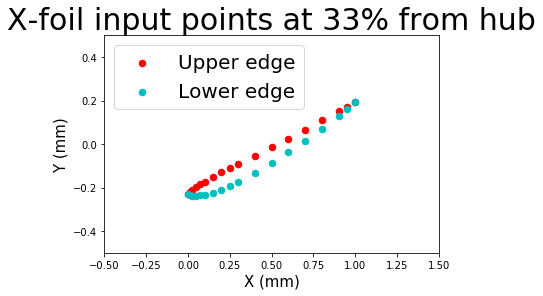

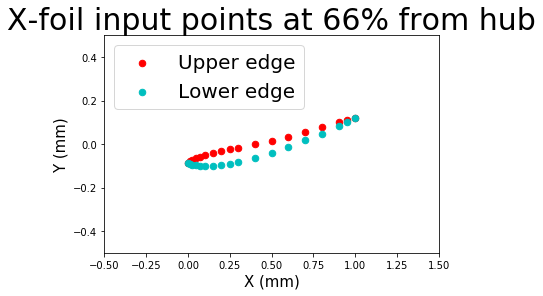

In [84]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )